## Jeremy Marcus Tan

## Lab 7

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
column_names = ["X1", "X2"]  
df = pd.read_csv("lab7_dataset.csv", header=None, names=column_names)

In [3]:
df.head()

,X1,X2
0,-5.746476,-7.915729
1,-3.911246,-5.682939
2,5.477369,2.087178
3,-2.738878,8.589364
4,-2.638993,8.262715


### KMeans Clustering

In [21]:
df_kmeans = df.copy()
kmeans = KMeans(n_clusters=3, random_state=42)
df_kmeans["Cluster"] = kmeans.fit_predict(df_kmeans)



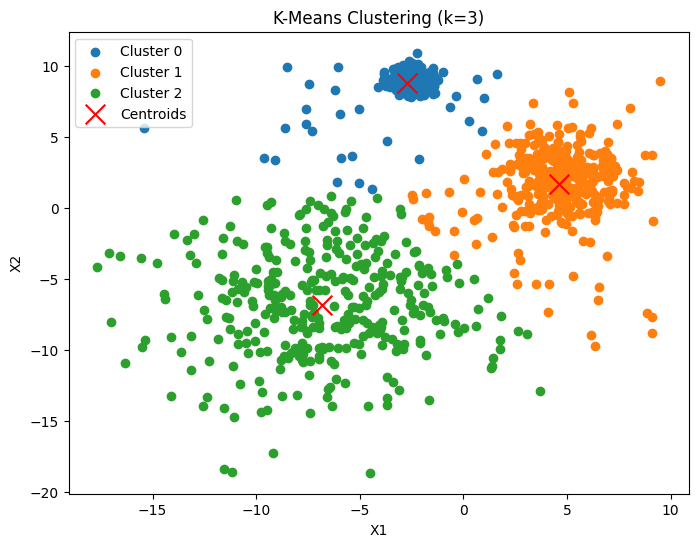

In [28]:
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_points = df_kmeans[df_kmeans["Cluster"] == cluster]
    plt.scatter(cluster_points["X1"], cluster_points["X2"], label=f"Cluster {cluster}")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c="red", marker="x", s=200, label="Centroids")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title(f"K-Means Clustering (k={3})")
plt.legend()
plt.show()

In [27]:
# Upper Left Point
df_kmeans[(df_kmeans["X1"]<-15) & (df_kmeans["X2"]>5)]

,X1,X2,Cluster
55,-15.422324,5.670885,0


In [30]:
# Upper Right Point
df_kmeans[(df_kmeans["X1"]>8) & (df_kmeans["X2"]>8)]

,X1,X2,Cluster
1087,9.507752,8.938316,1


In [31]:
# Four Lowest Points
df_kmeans[df_kmeans["X2"]<-17]

,X1,X2,Cluster
586,-11.559295,-18.369158,2
781,-9.185669,-17.244279,2
854,-11.168183,-18.565512,2
921,-4.505400,-18.641664,2


In [96]:
# 6 Points Cluster Membership
df_kmeans_6 = df_kmeans.iloc[[55,586,781,854,921,1087]]

### Gaussian Mixture Models

In [34]:
df_gmm = df.copy()

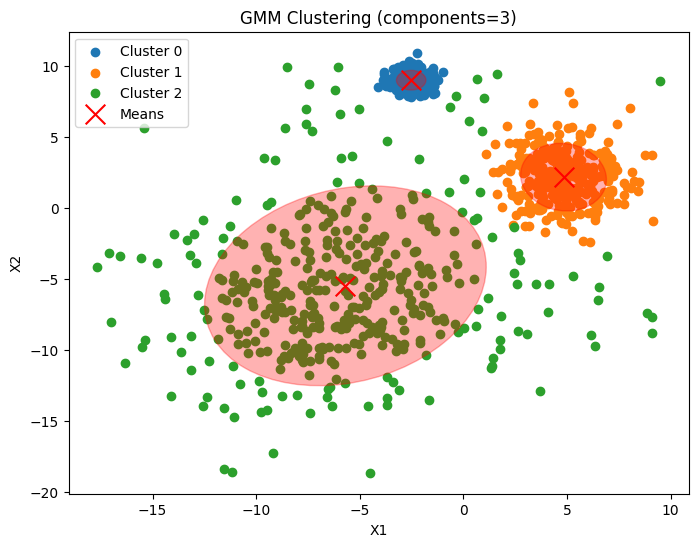

In [89]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Create a copy of the original dataframe
df_gmm = df.copy()

# Apply GMM clustering with 3 components
gmm = GaussianMixture(n_components=3, random_state=42)
df_gmm["Cluster"] = gmm.fit_predict(df_gmm)

# Visualize the GMM clusters
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_points = df_gmm[df_gmm["Cluster"] == cluster]
    plt.scatter(cluster_points["X1"], cluster_points["X2"], label=f"Cluster {cluster}")

# Plot the GMM means (equivalent to centroids in K-means)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], 
            c="red", marker="x", s=200, label="Means")

for i, (mean, covar) in enumerate(zip(gmm.means_, gmm.covariances_)):
    v, w = np.linalg.eigh(covar)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0]) * 180 / np.pi
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    
    ell = Ellipse(mean, v[0], v[1], angle=angle, 
                 alpha=0.3, color="red")  # Match cluster color
    plt.gca().add_artist(ell)


plt.xlabel("X1")
plt.ylabel("X2")
plt.title(f"GMM Clustering (components={3})")
plt.legend()
plt.show()

In [44]:
# Upper Left Point
df_gmm[(df_gmm["X1"]<-15) & (df_gmm["X2"]>5)]

,X1,X2,Cluster
55,-15.422324,5.670885,2


In [45]:
# Upper Right Point
df_gmm[(df_gmm["X1"]>8) & (df_gmm["X2"]>8)]

,X1,X2,Cluster
1087,9.507752,8.938316,2


In [46]:
# Four Lowest Points
df_gmm[df_gmm["X2"]<-17]

,X1,X2,Cluster
586,-11.559295,-18.369158,2
781,-9.185669,-17.244279,2
854,-11.168183,-18.565512,2
921,-4.505400,-18.641664,2


In [97]:
# 6 Points Cluster Membership
df_gmm_6 = df_gmm.iloc[[55,586,781,854,921,1087]]

Compared to the K Means clustering, the Gaussian Mixture Model assigned the upper left point to be part of cluster 2 instead of cluster 0. It also assigned the upper right point to cluster 2 instead of cluster 1. The four lowest points were assigned to cluster 2 in both the KMeans and GMM methods. 

### Ward's Method

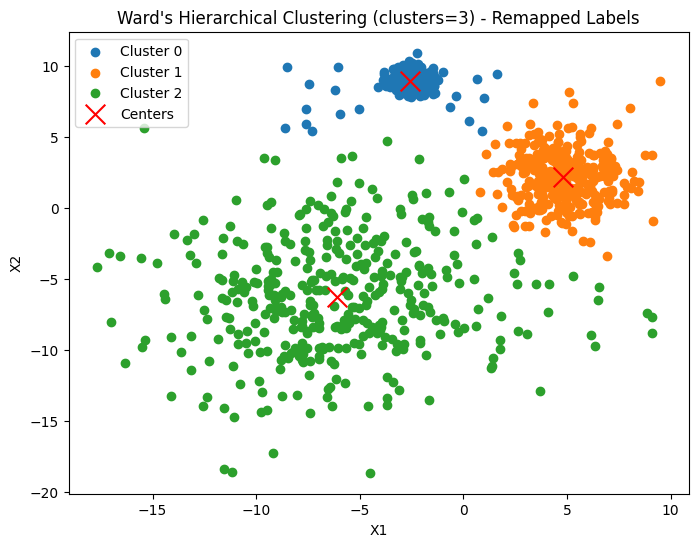

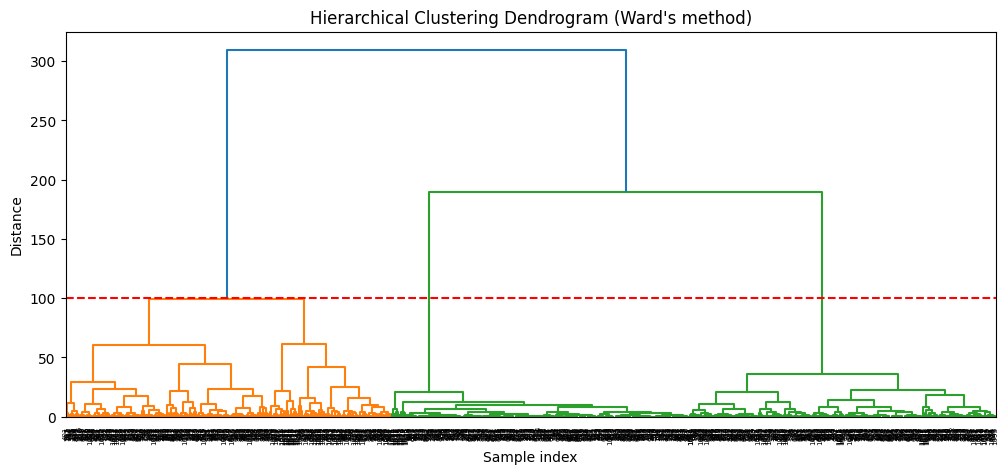

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the original dataframe
df_ward = df.copy()

# Extract the features
X = df_ward[["X1", "X2"]].values

# Perform hierarchical clustering with Ward's method (no scaling)
Z = linkage(X, method='ward')

# Assign cluster labels first
df_ward["Cluster"] = fcluster(Z, 3, criterion='maxclust') - 1  # Ensure 0,1,2 labels

# Define the mapping: 0 → 2, 1 → 0, 2 → 1
cluster_mapping = {0: 2, 1: 0, 2: 1}

# Apply the mapping to the cluster labels
df_ward["Cluster"] = df_ward["Cluster"].map(cluster_mapping)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Compute cluster centers
centers = []

for cluster in np.unique(df_ward["Cluster"]):  
    cluster_points = df_ward[df_ward["Cluster"] == cluster]
    plt.scatter(cluster_points["X1"], cluster_points["X2"], label=f"Cluster {cluster}")
    
    # Compute cluster center
    center = [cluster_points["X1"].mean(), cluster_points["X2"].mean()]
    centers.append(center)

# Convert to numpy array for easy plotting
centers = np.array(centers)

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="x", s=200, label="Centers")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Ward's Hierarchical Clustering (clusters=3) - Remapped Labels")
plt.legend()
plt.show()

# Visualize the dendrogram
plt.figure(figsize=(12, 5))
dendrogram(Z)
plt.axhline(y=100, c='red', linestyle='--', label='Threshold = 100')
plt.title("Hierarchical Clustering Dendrogram (Ward's method)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()




In [68]:
# Upper Left Point
df_ward[(df_ward["X1"]<-15) & (df_ward["X2"]>5)]

,X1,X2,Cluster
55,-15.422324,5.670885,2


In [69]:
# Upper Right Point
df_ward[(df_ward["X1"]>8) & (df_ward["X2"]>8)]

,X1,X2,Cluster
1087,9.507752,8.938316,1


In [70]:
# Four Lowest Points
df_ward[df_ward["X2"]<-17]

,X1,X2,Cluster
586,-11.559295,-18.369158,2
781,-9.185669,-17.244279,2
854,-11.168183,-18.565512,2
921,-4.505400,-18.641664,2


In [98]:
# 6 Points Cluster Membership
df_ward_6 = df_ward.iloc[[55,586,781,854,921,1087]]

Both the K Means and Ward's clustering methods assigned the upper right point and the four lowest points to the same cluster. The Ward's clustering method assigned the upper left point to cluster 2 while the K Means assigned the same point to cluster 0. 

### Spectral Clustering

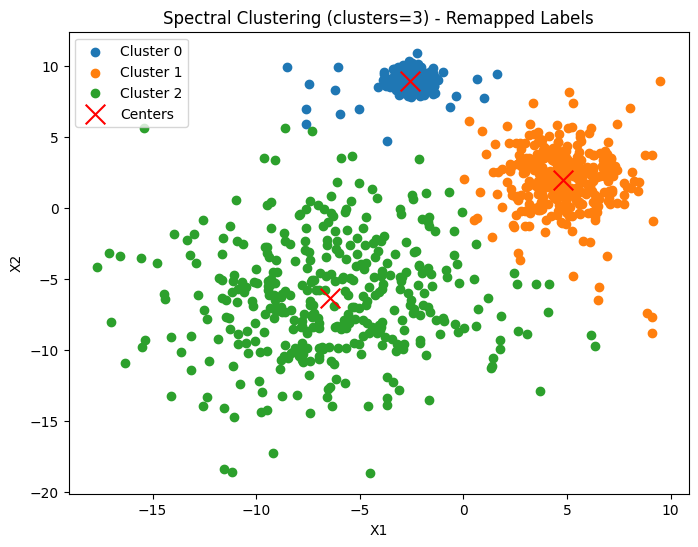

In [92]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the dataframe
df_spectral = df.copy()

# Extract features
X = df_spectral[["X1", "X2"]].values

# Perform Spectral Clustering (3 clusters)
sc = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=0)
labels = sc.fit_predict(X)

# Assign cluster labels to the dataframe
df_spectral["Cluster"] = labels

# Swap cluster 1 with cluster 2
df_spectral["Cluster"] = df_spectral["Cluster"].replace({1: 2, 2: 1})

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Compute and plot cluster centers manually
centers = []

for cluster in np.unique(df_spectral["Cluster"]):
    cluster_points = df_spectral[df_spectral["Cluster"] == cluster]
    plt.scatter(cluster_points["X1"], cluster_points["X2"], label=f"Cluster {cluster}")
    
    # Compute cluster center (mean)
    center = [cluster_points["X1"].mean(), cluster_points["X2"].mean()]
    centers.append(center)

# Convert to array
centers = np.array(centers)

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="x", s=200, label="Centers")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Spectral Clustering (clusters=3) - Remapped Labels")
plt.legend()
plt.show()


In [93]:
# Upper Left Point
df_spectral[(df_spectral["X1"]<-15) & (df_spectral["X2"]>5)]

,X1,X2,Cluster
55,-15.422324,5.670885,2


In [94]:
# Upper Right Point
df_spectral[(df_spectral["X1"]>8) & (df_spectral["X2"]>8)]

,X1,X2,Cluster
1087,9.507752,8.938316,1


In [95]:
# Four Lowest Points
df_spectral[df_spectral["X2"]<-17]

,X1,X2,Cluster
586,-11.559295,-18.369158,2
781,-9.185669,-17.244279,2
854,-11.168183,-18.565512,2
921,-4.505400,-18.641664,2


In [99]:
# 6 Points Cluster Membership
df_spectral_6 = df_spectral.iloc[[55,586,781,854,921,1087]]

The spectral clustering method assigned the six points to the same clusters as Ward's clustering method. Thus, compared to the K Means method, the upper right point and the four lowest points were assigned to the same cluster as the K Means while the upper left point was assigned to cluster 2. 

### Mean Shift Clustering

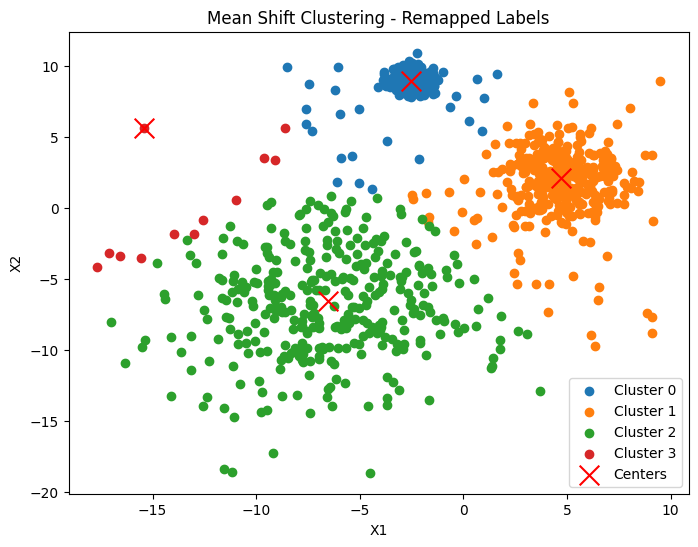

In [90]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the original dataframe
df_mean_shift = df.copy()

# Extract the features
X = df_mean_shift[["X1", "X2"]].values

# Perform Mean Shift Clustering
mean_shift = MeanShift()
labels = mean_shift.fit_predict(X)

# Assign cluster labels to the dataframe
df_mean_shift["Cluster"] = labels

# Relabel Cluster 0 as Cluster 1 and Cluster 1 as Cluster 0
df_mean_shift["Cluster"] = df_mean_shift["Cluster"].replace({0: 1, 1: 0})

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Compute and plot cluster centers
centers = mean_shift.cluster_centers_

for cluster in np.unique(df_mean_shift["Cluster"]):
    cluster_points = df_mean_shift[df_mean_shift["Cluster"] == cluster]
    plt.scatter(cluster_points["X1"], cluster_points["X2"], label=f"Cluster {cluster}")

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="x", s=200, label="Centers")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Mean Shift Clustering - Remapped Labels")
plt.legend()
plt.show()


In [85]:
# Upper Left Point
df_mean_shift[(df_mean_shift["X1"]<-15) & (df_mean_shift["X2"]>5)]

,X1,X2,Cluster
55,-15.422324,5.670885,3


In [86]:
# Upper Right Point
df_mean_shift[(df_mean_shift["X1"]>8) & (df_mean_shift["X2"]>8)]

,X1,X2,Cluster
1087,9.507752,8.938316,1


In [87]:
# Four Lowest Points
df_mean_shift[df_mean_shift["X2"]<-17]

,X1,X2,Cluster
586,-11.559295,-18.369158,2
781,-9.185669,-17.244279,2
854,-11.168183,-18.565512,2
921,-4.505400,-18.641664,2


In [100]:
# 6 Points Cluster Membership
df_mean_shift_6 = df_mean_shift.iloc[[55,586,781,854,921,1087]]

Since the number of clusters in mean shift clustering is not predefined, the algorithm created a fourth cluster whose centroid is located at the upper left point. The other five points were assigned to the same cluster as the K Means method.

### Cluster Assignment of the Six Points

In [111]:
merged_df = pd.concat([df_kmeans_6, df_gmm_6, df_ward_6, df_spectral_6, df_mean_shift_6], ignore_index=True, axis = 1)
merged_df = merged_df.iloc[:, [0,1,2,5,8,11,14]]
column_names = ["X1", "X2", "KMeans", "GMM", "Ward", "Spectral", "Mean Shift"]
merged_df.columns = column_names

In [112]:
merged_df

,X1,X2,KMeans,GMM,Ward,Spectral,Mean Shift
55,-15.422324,5.670885,0,2,2,2,3
586,-11.559295,-18.369158,2,2,2,2,2
781,-9.185669,-17.244279,2,2,2,2,2
854,-11.168183,-18.565512,2,2,2,2,2
921,-4.505400,-18.641664,2,2,2,2,2
1087,9.507752,8.938316,1,2,1,1,1
